# TV Show Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

### Data importation

Data from : https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [2]:
data = pd.read_csv("tv_shows.csv", sep=",",index_col=0)
data

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [3]:
data.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

### Some questions to answer

- Top 10 of TV shows according to IMDb, across all platforms.
- Top 10 of TV shows according to Rotten Tomatoes, across all platforms.
- All TV shows available on Hulu for children aged 7 and more sorted by preferences according to IMDb.
- The 20 oldest TV show produced only available on Disney+.
- (Best TV show produced in 2010 according to IMDb.)


- The number of TV Shows available on each platform.
- Evolution du nombre de séries produites par an depuis 1932
- The evolution of TV show produced accordinf to age limitation through years

In [4]:
data[data.IMDb.notnull()].sort_values(by="IMDb",ascending=False)[:10]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
3023,Destiny,2014,NaN,9.6,NaN,0,1,0,0,1
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
3747,Malgudi Days,1987,all,9.5,NaN,0,0,1,0,1
3177,Hungry Henry,2014,NaN,9.5,NaN,0,1,0,0,1
3567,Band of Brothers,2001,18+,9.4,94%,0,0,1,0,1
2365,The Joy of Painting,1983,all,9.4,NaN,0,1,1,0,1
4128,Green Paradise,2011,all,9.3,NaN,0,0,1,0,1
91,Our Planet,2019,7+,9.3,93%,1,0,0,0,1
3566,The Wire,2002,18+,9.3,94%,0,0,1,0,1
325,Ramayan,1987,all,9.3,NaN,1,0,0,0,1


In [5]:
data[data['Rotten Tomatoes'].notnull()].sort_values(by="Rotten Tomatoes",ascending=False)[:10]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
136,Alias Grace,2017,18+,7.8,99%,1,0,0,0,1
74,Ash vs Evil Dead,2015,18+,8.4,99%,1,0,0,0,1
2006,Broad City,2014,18+,8.4,99%,0,1,0,0,1
2002,Younger,2015,16+,7.8,99%,0,1,0,0,1
129,One Day at a Time,2017,7+,8.2,99%,1,0,0,0,1
3684,Wolf Hall,2015,16+,8.1,98%,0,0,1,0,1
201,Crazy Ex-Girlfriend,2015,16+,7.8,98%,1,0,0,0,1
97,The Vietnam War,2017,18+,9.1,98%,1,0,0,0,1
2048,Brockmire,2017,18+,8.1,98%,0,1,0,0,1
3605,Homecoming,2018,16+,7.5,98%,0,0,1,0,1


In [6]:
children = data['Age'].isin(['all','7+'])
platformHULU = data.Hulu == 1
data[children & platformHULU]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
16,Community,2009,7+,8.5,88%,1,1,0,0,1
59,The Twilight Zone,1959,7+,9.0,82%,1,1,0,0,1
63,Star Trek: The Next Generation,1987,7+,8.6,89%,1,1,1,0,1
88,Burn Notice,2007,7+,7.9,88%,1,1,1,0,1
99,Star Trek,1966,7+,8.3,80%,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3318,The Crowned Goddess,2015,7+,7.2,NaN,0,1,0,0,1
3358,Page Six TV,2017,7+,4.6,NaN,0,1,0,0,1
3368,NASA 360,2008,all,6.8,NaN,0,1,0,0,1
3391,ABC Monsters,2010,all,NaN,NaN,0,1,0,0,1


In [7]:
data[children & platformHULU].count()

Title              524
Year               524
Age                524
IMDb               520
Rotten Tomatoes     81
Netflix            524
Hulu               524
Prime Video        524
Disney+            524
type               524
dtype: int64

In [8]:
data[children & platformHULU].sort_values(by="IMDb", ascending=False)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
2365,The Joy of Painting,1983,all,9.4,NaN,0,1,1,0,1
2302,How the Universe Works,2010,7+,9.0,NaN,0,1,1,0,1
59,The Twilight Zone,1959,7+,9.0,82%,1,1,0,0,1
1948,Gravity Falls,2012,7+,8.9,100%,0,1,0,1,1
1952,Pride and Prejudice,1995,all,8.9,88%,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3144,My Super Sweet 16,2005,7+,1.8,NaN,0,1,0,0,1
3166,Big Block SingSong,2012,all,NaN,NaN,0,1,0,0,1
3246,Puppy Bowl,2005,all,NaN,NaN,0,1,0,0,1
3391,ABC Monsters,2010,all,NaN,NaN,0,1,0,0,1


In [20]:
data[(data["Disney+"]== 1) & (data["Prime Video"]==0) & (data.Hulu==0) & (data.Netflix==0)].sort_values(by="Year")[:20]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
5578,Spin and Marty,1955,all,8.2,NaN,0,0,0,1,1
5585,Spider-Woman,1979,all,5.7,NaN,0,0,0,1,1
5526,Spider-Man and His Amazing Friends,1981,7+,7.2,NaN,0,0,0,1,1
5488,Disney's Adventures of the Gummi Bears,1985,all,7.5,NaN,0,0,0,1,1
5467,DuckTales,1987,7+,8.1,NaN,0,0,0,1,1
5502,The New Adventures of Winnie the Pooh,1988,all,7.6,NaN,0,0,0,1,1
5477,Chip 'n' Dale Rescue Rangers,1989,all,7.6,NaN,0,0,0,1,1
5485,TaleSpin,1990,all,7.6,NaN,0,0,0,1,1
5480,Darkwing Duck,1991,7+,7.6,NaN,0,0,0,1,1
5528,Goof Troop,1992,all,6.8,NaN,0,0,0,1,1


In [9]:
netflix=["Netflix"]*data.Netflix.sum()

In [10]:
hulu=["Hulu"]*data.Hulu.sum()

In [11]:
prime=["Prime Video"]*data["Prime Video"].sum()

In [12]:
disney=["Disney+"]*data["Disney+"].sum()

(array([[1931.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0., 1754.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0., 2144.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          180.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 4 BarContainer objects>)

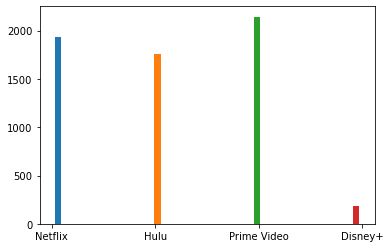

In [13]:
plt.hist([netflix, hulu, prime,disney])

<AxesSubplot:xlabel='Year'>

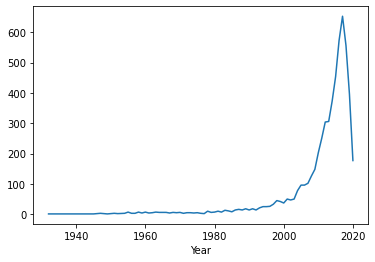

In [14]:
data[data.Year>=1932].groupby("Year").Title.count().plot()

In [15]:
date_age=data.pivot_table('type',index='Year', columns='Age', aggfunc=sum)
date_age

Age,13+,16+,18+,7+,all
Year,,,,,
1932,NaN,NaN,NaN,NaN,1.0
1934,NaN,NaN,NaN,NaN,1.0
1943,NaN,NaN,NaN,1.0,NaN
1947,NaN,NaN,NaN,NaN,1.0
1951,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
2016,NaN,114.0,52.0,65.0,38.0
2017,NaN,86.0,83.0,56.0,26.0
2018,NaN,107.0,103.0,64.0,36.0


<AxesSubplot:title={'center':'The evolution of TV show produced accordinf to age limitation through years'}, xlabel='Year'>

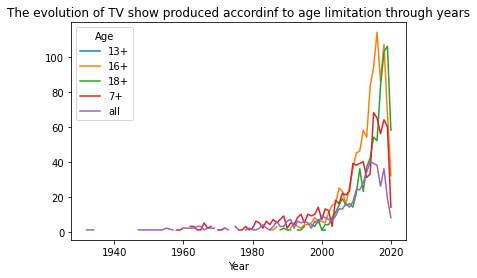

In [17]:
date_age.plot(title="The evolution of TV show produced accordinf to age limitation through years")